# 데이터셋 개요

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 경로 설정
census = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/census_starter.csv')
submission = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/[공모전]캐글 소기업 밀도 예측/microbusiness dataset/test.csv')

In [ ]:
census.shape, submission.shape, train.shape, test.shape

((3142, 26), (25080, 2), (122265, 7), (25080, 3))

In [ ]:
census

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [ ]:
census.info()
# 카운티(county) : 주(state)의 하위 행정구역 단위
# cfips : 카운티 식별 번호; 앞 두 자리는 주, 뒤 세 자리는 카운티

# pct : percentage
## bb : 브로드밴드 접근 가능 가구 비율
## college : 25세 이상 4년제 대학 학위 인구 비율
## foreign_born : 미국 출생 아닌 인구 비율
## it_workers : 정보산업 종사자 비율

# median_hh_inc : 가구당 소득 중앙값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pct_bb_2017            3142 non-null   float64
 1   pct_bb_2018            3142 non-null   float64
 2   pct_bb_2019            3142 non-null   float64
 3   pct_bb_2020            3141 non-null   float64
 4   pct_bb_2021            3141 non-null   float64
 5   cfips                  3142 non-null   int64  
 6   pct_college_2017       3142 non-null   float64
 7   pct_college_2018       3142 non-null   float64
 8   pct_college_2019       3142 non-null   float64
 9   pct_college_2020       3141 non-null   float64
 10  pct_college_2021       3141 non-null   float64
 11  pct_foreign_born_2017  3142 non-null   float64
 12  pct_foreign_born_2018  3142 non-null   float64
 13  pct_foreign_born_2019  3142 non-null   float64
 14  pct_foreign_born_2020  3141 non-null   float64
 15  pct_

In [ ]:
train

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


In [ ]:
train.info()
# microbusiness_density : 소기업 밀도(타겟 변수); 18세 이상 인구 100명당 소기업; 계산에 사용된 인구 정보는 2년 전 집계
# active : 카운티에 존재하는 소기업 실제 빈도

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122265 entries, 0 to 122264
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


- 참고 : census(2017-2021)의 인구 정보는 density(2019-2023)를 계산할 실제 시기에 2년 전 값을 사용

In [ ]:
test
# revealed_test.csv가 2월 중순에 공개 예정

,row_id,cfips,first_day_of_month
0,1001_2022-11-01,1001,2022-11-01
1,1003_2022-11-01,1003,2022-11-01
2,1005_2022-11-01,1005,2022-11-01
3,1007_2022-11-01,1007,2022-11-01
4,1009_2022-11-01,1009,2022-11-01
...,...,...,...
25075,56037_2023-06-01,56037,2023-06-01
25076,56039_2023-06-01,56039,2023-06-01
25077,56041_2023-06-01,56041,2023-06-01
25078,56043_2023-06-01,56043,2023-06-01


In [ ]:
submission # 제출 포맷

,row_id,microbusiness_density
0,1001_2022-11-01,3.817671
1,1003_2022-11-01,3.817671
2,1005_2022-11-01,3.817671
3,1007_2022-11-01,3.817671
4,1009_2022-11-01,3.817671
...,...,...
25075,56037_2023-06-01,3.817671
25076,56039_2023-06-01,3.817671
25077,56041_2023-06-01,3.817671
25078,56043_2023-06-01,3.817671


# EDA

# Baseline
census 데이터와 시계열 데이터의 feature engineering에 초점

## 개요

In [ ]:
len(train.cfips.unique())
# 카운티 범주

3135

In [ ]:
len(train.first_day_of_month.unique())
# 시간 범주

39

목적 : 22년 11월 ~ 23년 6월의 8개월에 대한 밀도 예측
- 39개의 시간 범주는 이러한 예측을 위한 학습에 충분하지 않음

전체적인 흐름
- 각 카운티별로 태스크를 나눠서 수행, 즉, 하나의 카운티마다 하나의 태스크를 수행
- 태스크 단계
 1. 시계열 분할 교차검증 데이터셋에서 모델 구축
 2. 다양한 회귀 모델 중 해당 카운티에서 가장 성능이 좋은 모델 채택
 - 전체적으로 3135*(모델 종류 개수)번 모델 훈련 필요

feature engineering
- 서로 다른 시간 사이의 데이터
- 이동 평균 : 업데이트되는 특정 기간에서의 평균; 기간의 길이는 고정
- (지수)가중 이동 평균 : 지수적으로 감소하는 가중치를 최근 순으로 부여하여 계산
 - 가장 최근 데이터에 가장 큰 가중치 부여

아래 특성들을 각 카운티의 소기업 및 젊은 사람의 수에 영향을 주는 요소로 생각
- 추가적으로, 시기별로 주(state) 평균 소기업 밀도 및 국가(national) 평균 소기업 밀도 추출 가능

(참고) 그리드서치 / 하이퍼파라미터 튜닝 / 시계열 변수 구간 길이 조정 / 외부 데이터 활용

In [ ]:
print(census.columns.sort_values()[1:].values)

['median_hh_inc_2017' 'median_hh_inc_2018' 'median_hh_inc_2019'
 'median_hh_inc_2020' 'median_hh_inc_2021' 'pct_bb_2017' 'pct_bb_2018'
 'pct_bb_2019' 'pct_bb_2020' 'pct_bb_2021' 'pct_college_2017'
 'pct_college_2018' 'pct_college_2019' 'pct_college_2020'
 'pct_college_2021' 'pct_foreign_born_2017' 'pct_foreign_born_2018'
 'pct_foreign_born_2019' 'pct_foreign_born_2020' 'pct_foreign_born_2021'
 'pct_it_workers_2017' 'pct_it_workers_2018' 'pct_it_workers_2019'
 'pct_it_workers_2020' 'pct_it_workers_2021']


## 코드

In [ ]:
# 라이브러리
!pip install geopandas
!pip install xgboost==1.7.3
pd.set_option('display.max_columns', 500)
import plotly.figure_factory as ff
import geopandas
import shapely
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
# 이동 평균 및 가중 이동 평균 계산 함수 정의 
def moving_average(df,i,n):
  MA = pd.Series(df[i].rolling(n, min_periods=n).mean(), name='MA_'+str(n))
  df = df.join(MA)
  return df
  
def weighted_moving_average(df,i,n):
  EMA = pd.Series(df[i].ewm(span=n, adjust=False, min_periods=n).mean(), name='EMA_'+str(n))
  df = df.join(EMA)
  return df

In [ ]:
# 합친 후 구분을 위해 train, test를 구분 가능한 변수 생성
train['dataset'] = 'train'
test['dataset'] = 'test'
# train, test 합쳐서 df에 저장
df = pd.concat([train, test]).sort_values('row_id').reset_index(drop=True)

In [ ]:
# census를 df로 조인(카운티 식별 번호 기준)하여 df_all에 저장
df_all = df.merge(census, on='cfips', how='left')

In [ ]:
# 날짜형 변수 처리
df_all['first_day_of_month'] = pd.to_datetime(df_all["first_day_of_month"])
# 연 월 변수 생성
df_all["year"] = df_all["first_day_of_month"].dt.year
df_all['month'] = df_all["first_day_of_month"].dt.month

In [ ]:
# census에서 병합된 열에서 시간이 맞는 데이터를 추출
conditions = [df_all['year']==2019,df_all['year']==2020,df_all['year']==2021,df_all['year']==2022,df_all['year']==2023]
choices_bb = [df_all['pct_bb_2017'],df_all['pct_bb_2018'],df_all['pct_bb_2019'],df_all['pct_bb_2020'],df_all['pct_bb_2021'] ]
choices_college = [df_all['pct_college_2017'],df_all['pct_college_2018'],df_all['pct_college_2019'],df_all['pct_college_2020'],df_all['pct_college_2021']]
choices_foreign = [df_all['pct_foreign_born_2017'],df_all['pct_foreign_born_2018'],df_all['pct_foreign_born_2019'],df_all['pct_foreign_born_2020'],df_all['pct_foreign_born_2021']]
choices_workers = [df_all['pct_it_workers_2017'],df_all['pct_it_workers_2018'],df_all['pct_it_workers_2019'],df_all['pct_it_workers_2020'],df_all['pct_it_workers_2021']]
choices_inc = [df_all['median_hh_inc_2017'],df_all['median_hh_inc_2018'],df_all['median_hh_inc_2019'],df_all['median_hh_inc_2020'],df_all['median_hh_inc_2021']]

df_all["pct_bb"] = np.select(conditions, choices_bb, default=np.nan)
df_all["pct_college"] = np.select(conditions, choices_college, default=np.nan)
df_all["pct_foreign"] = np.select(conditions, choices_foreign, default=np.nan)
df_all["pct_workers"] = np.select(conditions, choices_workers, default=np.nan)
df_all["pct_inc"] = np.select(conditions, choices_inc, default=np.nan)

# 필요 없어진 열 삭제
df_all.drop(['pct_bb_2017','pct_bb_2018','pct_bb_2019','pct_bb_2020','pct_bb_2021',
             'pct_college_2017','pct_college_2018','pct_college_2019','pct_college_2020','pct_college_2021',
             'pct_foreign_born_2017','pct_foreign_born_2018','pct_foreign_born_2019','pct_foreign_born_2020','pct_foreign_born_2021',
             'pct_it_workers_2017','pct_it_workers_2018','pct_it_workers_2019','pct_it_workers_2020','pct_it_workers_2021',
             'median_hh_inc_2017','median_hh_inc_2018','median_hh_inc_2019','median_hh_inc_2020','median_hh_inc_2021'],
            axis=1,inplace=True)

In [ ]:
df_all

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,dataset,year,month,pct_bb,pct_college,pct_foreign,pct_workers,pct_inc
0,10001_2019-08-01,10001,Kent County,Delaware,2019-08-01,4.995701,6624.0,train,2019,8,80.8,14.5,6.0,1.3,57647.0
1,10001_2019-09-01,10001,Kent County,Delaware,2019-09-01,5.031902,6672.0,train,2019,9,80.8,14.5,6.0,1.3,57647.0
2,10001_2019-10-01,10001,Kent County,Delaware,2019-10-01,5.098270,6760.0,train,2019,10,80.8,14.5,6.0,1.3,57647.0
3,10001_2019-11-01,10001,Kent County,Delaware,2019-11-01,5.124666,6795.0,train,2019,11,80.8,14.5,6.0,1.3,57647.0
4,10001_2019-12-01,10001,Kent County,Delaware,2019-12-01,5.086203,6744.0,train,2019,12,80.8,14.5,6.0,1.3,57647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147340,9015_2023-02-01,9015,NaN,NaN,2023-02-01,NaN,NaN,test,2023,2,87.1,13.9,4.6,1.4,71418.0
147341,9015_2023-03-01,9015,NaN,NaN,2023-03-01,NaN,NaN,test,2023,3,87.1,13.9,4.6,1.4,71418.0
147342,9015_2023-04-01,9015,NaN,NaN,2023-04-01,NaN,NaN,test,2023,4,87.1,13.9,4.6,1.4,71418.0
147343,9015_2023-05-01,9015,NaN,NaN,2023-05-01,NaN,NaN,test,2023,5,87.1,13.9,4.6,1.4,71418.0


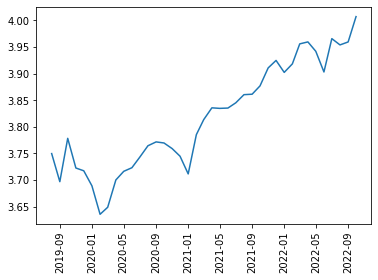

In [ ]:
# 각 카운티의 시기별 소기업 밀도를 보여주는 피벗 테이블 
train_pivoted = df_all.pivot(index='cfips',columns='first_day_of_month',values='microbusiness_density')

# 시기별 평균 소기업 밀도 시각화
plt.plot(train_pivoted.mean(axis=0));
plt.xticks(rotation=90);

> 해석
- Covid-19로 소기업 밀도가 급격히 감소했던 시기가 존재
- 이후 엔데믹으로 완화되면서 소기업 밀도가 증가하여 최근에는 18세 이상 인구 100명 중 4명 정도는 소기업을 소유

In [ ]:
# 시계열 변수 생성; 3,6 이외에도 바꿔서 시도해보기
## 이동 평균 변수 생성
df_all = moving_average(df_all, 'microbusiness_density', 3)
df_all = moving_average(df_all, 'microbusiness_density', 6)

## 가중 이동 평균 생성
df_all = weighted_moving_average(df_all, 'microbusiness_density', 3)
df_all = weighted_moving_average(df_all, 'microbusiness_density', 6)

In [ ]:
df_all.iloc[:,-4:].head(6)
# 구간의 길이를 3,6으로 하여 이동 평균을 계산하였으므로 앞에 결측치가 발생

,MA_3,MA_6,EMA_3,EMA_6
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,5.041958,NaN,5.056036,NaN
3,5.084946,NaN,5.090351,NaN
4,5.103046,NaN,5.088277,NaN
5,5.076114,5.059036,5.052875,5.052563


In [ ]:
# 전월 대비 소기업 밀도의 변화를 나타내는 변수 생성
df_all['pct_change_before'] = df_all['microbusiness_density'].pct_change().shift(1)

In [ ]:
df_all[['microbusiness_density','pct_change_before']].head()

,microbusiness_density,pct_change_before
0,4.995701,NaN
1,5.031902,NaN
2,5.098270,0.007246
3,5.124666,0.013189
4,5.086203,0.005178


In [ ]:
# 계산 방식 예시
5.031902/4.995701 - 1
# 결과를 한 칸 아래로 이동하여 저장하는 이유는 아마 예측할 때 작용하는 요인으로서 인덱싱을 용이하게 하기 위함으로 보임

0.007246430480927435

In [ ]:
# 지연된 밀도 변수 생성; 지연 구간 길이 1~5; 결측치는 다음 값으로 대체
def lag_feature(df):
  for lag in range(1, 6):
    df[f'lag_density_{lag}'] = df.groupby('cfips')['microbusiness_density'].shift(lag)
    df[f'lag_density_{lag}'] = df.groupby('cfips')[f'lag_density_{lag}'].bfill()
  return df

df_all = lag_feature(df_all)

In [ ]:
pd.concat([df_all['microbusiness_density'], df_all.iloc[:,-5:]], axis=1).head()

,microbusiness_density,lag_density_1,lag_density_2,lag_density_3,lag_density_4,lag_density_5
0,4.995701,4.995701,4.995701,4.995701,4.995701,4.995701
1,5.031902,4.995701,4.995701,4.995701,4.995701,4.995701
2,5.098270,5.031902,4.995701,4.995701,4.995701,4.995701
3,5.124666,5.098270,5.031902,4.995701,4.995701,4.995701
4,5.086203,5.124666,5.098270,5.031902,4.995701,4.995701


In [ ]:
# 시기별 국가 평균 소기업 밀도 
df_all['national_avg'] = df_all.groupby(['year','month'])['microbusiness_density'].transform('mean')
# 시기별 주 평균 소기업 밀도
df_all['state_avg'] = df_all.groupby(['state','year','month'])['microbusiness_density'].transform('mean')

In [ ]:
# 익월 밀도를 예측하는 것이 목표이므로 아래와 같은 target 변수(금월 데이터를 통한 익월 예측의 정답을 의미)로 생성
df_all['target'] = df_all.groupby('cfips')['microbusiness_density'].shift(-1)
df_all[['microbusiness_density','target']]

,microbusiness_density,target
0,4.995701,5.031902
1,5.031902,5.098270
2,5.098270,5.124666
3,5.124666,5.086203
4,5.086203,5.017472
...,...,...
147340,NaN,NaN
147341,NaN,NaN
147342,NaN,NaN
147343,NaN,NaN


In [ ]:
# 데이터셋 처리 과정 중간 확인
df_all.columns.values == np.array(['row_id', 'cfips', 'county', 'state', 'first_day_of_month',
                                   'microbusiness_density', 'active', 'dataset', 'year', 'month', 'pct_bb',
                                   'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc', 'MA_3', 'MA_6',
                                   'EMA_3', 'EMA_6', 'pct_change_before', 'lag_density_1', 'lag_density_2',
                                   'lag_density_3', 'lag_density_4', 'lag_density_5', 'national_avg',
                                   'state_avg', 'target'])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [ ]:
# SMAPE : Symmetric Mean Absolute Percentage Error
# SMAPE = (1/n) * Σ( |forecast-actual| / ((|forecast|+|actual|)/2) ) * 100
# 하한 0% / 상한 200%
def SMAPE(a, f):
  return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(f)+np.abs(a)) * 100)

In [ ]:
# inf을 nan으로 대체; 원래도 없는 것 같음
df_all = df_all.replace([np.inf, -np.inf], np.nan)

In [ ]:
# feature list
feature_list = ['year', 'month', 'pct_bb','microbusiness_density',
                'pct_college', 'pct_foreign', 'pct_workers', 'pct_inc',
                'MA_3', 'MA_6', 'EMA_3', 'EMA_6',
                'lag_density_1', 'lag_density_2', 'lag_density_3', 'lag_density_4', 'lag_density_5',
                'pct_change_before', 'national_avg', 'state_avg']
len(feature_list)

20

In [ ]:
len(df_all.columns)

28

In [ ]:
# feature_list에서 제외된 특성
set(df_all.columns) - set(feature_list)

{'active',
 'cfips',
 'county',
 'dataset',
 'first_day_of_month',
 'row_id',
 'state',
 'target'}

In [ ]:
# 데이터셋 분할
sample_train = df_all[df_all['dataset']=='train']
train_X = sample_train[feature_list]
train_y = sample_train['target']

In [ ]:
train_X.head()

,year,month,pct_bb,microbusiness_density,pct_college,pct_foreign,pct_workers,pct_inc,MA_3,MA_6,EMA_3,EMA_6,lag_density_1,lag_density_2,lag_density_3,lag_density_4,lag_density_5,pct_change_before,national_avg,state_avg
0,2019,8,80.8,4.995701,14.5,6.0,1.3,57647.0,NaN,NaN,NaN,NaN,4.995701,4.995701,4.995701,4.995701,4.995701,NaN,3.749621,10.094114
1,2019,9,80.8,5.031902,14.5,6.0,1.3,57647.0,NaN,NaN,NaN,NaN,4.995701,4.995701,4.995701,4.995701,4.995701,NaN,3.696846,10.648283
2,2019,10,80.8,5.098270,14.5,6.0,1.3,57647.0,5.041958,NaN,5.056036,NaN,5.031902,4.995701,4.995701,4.995701,4.995701,0.007246,3.778263,10.707502
3,2019,11,80.8,5.124666,14.5,6.0,1.3,57647.0,5.084946,NaN,5.090351,NaN,5.098270,5.031902,4.995701,4.995701,4.995701,0.013189,3.722510,10.813359
4,2019,12,80.8,5.086203,14.5,6.0,1.3,57647.0,5.103046,NaN,5.088277,NaN,5.124666,5.098270,5.031902,4.995701,4.995701,0.005178,3.717284,10.893850


시계열 분할 방식을 통해 데이터셋을 구성해야 함
- 미래 시점을 통해 미리 학습하는 것을 방지
- 점진적 구성

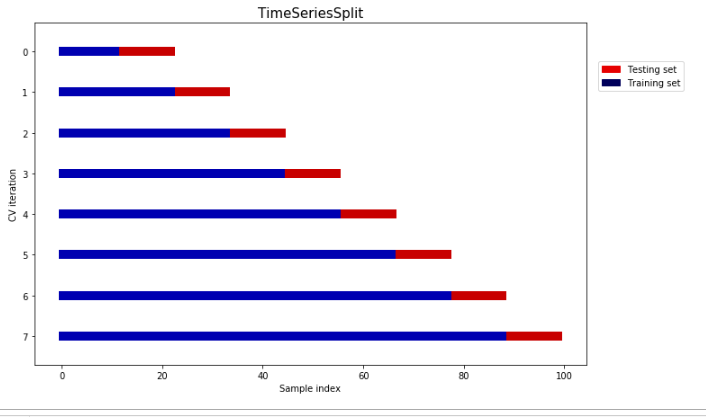

In [ ]:
# SMAPE 손실을 모델 성능 지표로 사용하는 시계열 분할 교차검증 함수 정의
def smape_cv(model):
  tscv = TimeSeriesSplit(n_splits=7)
  smape_list = []
  model_name = model.__class__.__name__
  for _, (train_index, test_index) in tqdm(enumerate(tscv.split(train_X), start=1), 
                                           desc=f'{model_name} Cross Validations', total=7):
    X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
    y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
    clf = model.fit(X_train, y_train)
    pred = clf.predict(X_test)
    smape = SMAPE(y_test, pred) 
    smape_list.append(smape)
  return model_name, smape_list

def print_smape_score(model):
  model_name, score = smape_cv(model)
  for i, r in enumerate(score, start=1):
    print(f'{i} FOLDS: {model_name} smape: {r:.4f}')
  print(f'\n{model_name} mean smape: {np.mean(score):.4f}')
  print('='*30)
  return model_name, np.mean(score)

In [ ]:
# 카운티마다 7개 모델 훈련; 하이퍼파라미터 튜닝 가능
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Elastic = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
RF = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=5, min_samples_split=2, min_samples_leaf=2, random_state=1, n_jobs=-1)
XGB = xgb.XGBRegressor(n_estimators=500, max_depth=5, min_child_weight=5, gamma=0.1, n_jobs=-1)
LGBM = lgb.LGBMRegressor(n_estimators=500, max_depth=5, min_child_weight=5, n_jobs=-1)

In [ ]:
model_list = [reg, ridge, lasso, Elastic, RF, XGB, LGBM]

In [ ]:
# 카운티별로 구분하여 훈련하는 코드
# 시간이 너무 오래 걸림; 3135개의 카운티마다 8개 모델을 시계열 분할 7-폴드 교차검증 수행
# 카운티 1개에 5초라고 잡아도 4시간 30분 소요
# 따라서 예시만 보이기 위해 일부 카운티만 선택하여 적용
test_list = [1001, 9011, 9007, 40055, 29107, 56045]
# test_list = df_all.cfips.unique() # 모든 카운티에 대해 각각 적용

In [ ]:
submit_df = pd.DataFrame()
model_results = {}
county_and_model = {}

for i in test_list:
  print(f'+++++++++++++++++++++ county {i} modeling +++++++++++++++++++++')
  sample = df_all[df_all['cfips']==i]
  sample_train = sample[sample['dataset']=='train']
  train_X = sample_train[feature_list]
  train_y = sample_train['target']
  train_X.fillna(method='bfill', inplace=True)
  train_X.fillna(method='ffill', inplace=True)
    
  model_dict = {}
  for model in model_list:
    model_name, mean_score = print_smape_score(model)
    model_dict[model_name] = mean_score
    model_results[i] = min(model_dict.values())
        
  final_model = model_list[list(model_dict.keys()).index(min(model_dict, key=model_dict.get))]
    
  sample.fillna(method='ffill', inplace=True)
  sample_test = sample[sample['dataset']=='test']
  submit_X = sample_test[feature_list]
  
  # 예측
  county_and_model[i] = min(model_dict, key=model_dict.get)
  print(county_and_model)
    
  predict_result = final_model.predict(submit_X).tolist()  
  df = pd.DataFrame(list(zip(sample_test['row_id'].values.tolist(), predict_result)),
                    columns=['row_id','microbusiness_density'])
  submit_df = submit_df.append(df)
  print('===================================================================')
  print()

+++++++++++++++++++++ county 1001 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 116.13it/s]


1 FOLDS: LinearRegression smape: 3.4414
2 FOLDS: LinearRegression smape: 73.1421
3 FOLDS: LinearRegression smape: 14.2886
4 FOLDS: LinearRegression smape: 3.1888
5 FOLDS: LinearRegression smape: 0.6124
6 FOLDS: LinearRegression smape: 0.9144
7 FOLDS: LinearRegression smape: 3.4557

LinearRegression mean smape: 14.1490


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 198.35it/s]


1 FOLDS: Ridge smape: 2.8832
2 FOLDS: Ridge smape: 7.0077
3 FOLDS: Ridge smape: 1.8471
4 FOLDS: Ridge smape: 0.4958
5 FOLDS: Ridge smape: 1.4843
6 FOLDS: Ridge smape: 1.1052
7 FOLDS: Ridge smape: 0.8570

Ridge mean smape: 2.2401


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.46it/s]


1 FOLDS: Lasso smape: 3.2708
2 FOLDS: Lasso smape: 6.4598
3 FOLDS: Lasso smape: 4.5094
4 FOLDS: Lasso smape: 0.3807
5 FOLDS: Lasso smape: 1.2292
6 FOLDS: Lasso smape: 1.1168
7 FOLDS: Lasso smape: 1.0310

Lasso mean smape: 2.5711


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 136.54it/s]


1 FOLDS: ElasticNet smape: 2.8114
2 FOLDS: ElasticNet smape: 7.0072
3 FOLDS: ElasticNet smape: 1.7769
4 FOLDS: ElasticNet smape: 0.5151
5 FOLDS: ElasticNet smape: 1.4733
6 FOLDS: ElasticNet smape: 1.1054
7 FOLDS: ElasticNet smape: 0.8405

ElasticNet mean smape: 2.2185


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]


1 FOLDS: RandomForestRegressor smape: 4.9438
2 FOLDS: RandomForestRegressor smape: 2.9238
3 FOLDS: RandomForestRegressor smape: 2.7590
4 FOLDS: RandomForestRegressor smape: 0.9228
5 FOLDS: RandomForestRegressor smape: 3.7186
6 FOLDS: RandomForestRegressor smape: 1.9405
7 FOLDS: RandomForestRegressor smape: 1.7421

RandomForestRegressor mean smape: 2.7072


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]


1 FOLDS: XGBRegressor smape: 5.4190
2 FOLDS: XGBRegressor smape: 2.4634
3 FOLDS: XGBRegressor smape: 5.9585
4 FOLDS: XGBRegressor smape: 3.3483
5 FOLDS: XGBRegressor smape: 5.5145
6 FOLDS: XGBRegressor smape: 5.5280
7 FOLDS: XGBRegressor smape: 4.3714

XGBRegressor mean smape: 4.6576


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.34it/s]


1 FOLDS: LGBMRegressor smape: 5.4190
2 FOLDS: LGBMRegressor smape: 2.4634
3 FOLDS: LGBMRegressor smape: 5.9585
4 FOLDS: LGBMRegressor smape: 4.3245
5 FOLDS: LGBMRegressor smape: 7.0703
6 FOLDS: LGBMRegressor smape: 7.7312
7 FOLDS: LGBMRegressor smape: 6.7916

LGBMRegressor mean smape: 5.6798
{1001: 'ElasticNet'}

+++++++++++++++++++++ county 9011 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.28it/s]


1 FOLDS: LinearRegression smape: 1.1227
2 FOLDS: LinearRegression smape: 1.6780
3 FOLDS: LinearRegression smape: 0.3082
4 FOLDS: LinearRegression smape: 0.8761
5 FOLDS: LinearRegression smape: 0.5571
6 FOLDS: LinearRegression smape: 1.1855
7 FOLDS: LinearRegression smape: 0.4117

LinearRegression mean smape: 0.8770


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 203.11it/s]


1 FOLDS: Ridge smape: 0.3655
2 FOLDS: Ridge smape: 1.6548
3 FOLDS: Ridge smape: 0.4999
4 FOLDS: Ridge smape: 0.3484
5 FOLDS: Ridge smape: 0.4018
6 FOLDS: Ridge smape: 0.7186
7 FOLDS: Ridge smape: 0.2275

Ridge mean smape: 0.6024


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 143.34it/s]


1 FOLDS: Lasso smape: 0.4381
2 FOLDS: Lasso smape: 1.5152
3 FOLDS: Lasso smape: 0.3675
4 FOLDS: Lasso smape: 0.2912
5 FOLDS: Lasso smape: 0.3291
6 FOLDS: Lasso smape: 0.6997
7 FOLDS: Lasso smape: 0.2902

Lasso mean smape: 0.5616


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 153.09it/s]


1 FOLDS: ElasticNet smape: 0.3707
2 FOLDS: ElasticNet smape: 1.6812
3 FOLDS: ElasticNet smape: 0.4642
4 FOLDS: ElasticNet smape: 0.3399
5 FOLDS: ElasticNet smape: 0.3734
6 FOLDS: ElasticNet smape: 0.6976
7 FOLDS: ElasticNet smape: 0.2248

ElasticNet mean smape: 0.5931


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]


1 FOLDS: RandomForestRegressor smape: 2.4840
2 FOLDS: RandomForestRegressor smape: 0.8254
3 FOLDS: RandomForestRegressor smape: 0.3003
4 FOLDS: RandomForestRegressor smape: 1.0852
5 FOLDS: RandomForestRegressor smape: 1.0289
6 FOLDS: RandomForestRegressor smape: 0.8176
7 FOLDS: RandomForestRegressor smape: 1.1199

RandomForestRegressor mean smape: 1.0944


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.13it/s]


1 FOLDS: XGBRegressor smape: 2.7382
2 FOLDS: XGBRegressor smape: 1.1800
3 FOLDS: XGBRegressor smape: 2.0843
4 FOLDS: XGBRegressor smape: 2.7230
5 FOLDS: XGBRegressor smape: 3.0301
6 FOLDS: XGBRegressor smape: 3.0284
7 FOLDS: XGBRegressor smape: 2.3954

XGBRegressor mean smape: 2.4542


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 64.97it/s]


1 FOLDS: LGBMRegressor smape: 2.7382
2 FOLDS: LGBMRegressor smape: 1.1800
3 FOLDS: LGBMRegressor smape: 2.0843
4 FOLDS: LGBMRegressor smape: 2.7230
5 FOLDS: LGBMRegressor smape: 3.3584
6 FOLDS: LGBMRegressor smape: 3.3670
7 FOLDS: LGBMRegressor smape: 3.2984

LGBMRegressor mean smape: 2.6785
{1001: 'ElasticNet', 9011: 'Lasso'}

+++++++++++++++++++++ county 9007 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 190.96it/s]


1 FOLDS: LinearRegression smape: 0.9151
2 FOLDS: LinearRegression smape: 2.8073
3 FOLDS: LinearRegression smape: 1.0622
4 FOLDS: LinearRegression smape: 0.6102
5 FOLDS: LinearRegression smape: 1.6921
6 FOLDS: LinearRegression smape: 0.9286
7 FOLDS: LinearRegression smape: 0.3666

LinearRegression mean smape: 1.1974


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.76it/s]


1 FOLDS: Ridge smape: 0.7032
2 FOLDS: Ridge smape: 2.4916
3 FOLDS: Ridge smape: 0.8404
4 FOLDS: Ridge smape: 0.5798
5 FOLDS: Ridge smape: 2.4827
6 FOLDS: Ridge smape: 0.5662
7 FOLDS: Ridge smape: 0.1028

Ridge mean smape: 1.1095


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 146.30it/s]


1 FOLDS: Lasso smape: 0.5283
2 FOLDS: Lasso smape: 2.4654
3 FOLDS: Lasso smape: 0.1575
4 FOLDS: Lasso smape: 0.2656
5 FOLDS: Lasso smape: 1.2875
6 FOLDS: Lasso smape: 0.5633
7 FOLDS: Lasso smape: 0.2954

Lasso mean smape: 0.7947


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 166.85it/s]


1 FOLDS: ElasticNet smape: 0.7037
2 FOLDS: ElasticNet smape: 2.4977
3 FOLDS: ElasticNet smape: 0.9372
4 FOLDS: ElasticNet smape: 0.5952
5 FOLDS: ElasticNet smape: 2.4066
6 FOLDS: ElasticNet smape: 0.5618
7 FOLDS: ElasticNet smape: 0.0994

ElasticNet mean smape: 1.1145


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]


1 FOLDS: RandomForestRegressor smape: 0.3533
2 FOLDS: RandomForestRegressor smape: 2.3536
3 FOLDS: RandomForestRegressor smape: 0.2114
4 FOLDS: RandomForestRegressor smape: 0.6275
5 FOLDS: RandomForestRegressor smape: 0.6005
6 FOLDS: RandomForestRegressor smape: 0.6152
7 FOLDS: RandomForestRegressor smape: 0.0928

RandomForestRegressor mean smape: 0.6935


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.21it/s]


1 FOLDS: XGBRegressor smape: 0.3588
2 FOLDS: XGBRegressor smape: 2.4311
3 FOLDS: XGBRegressor smape: 1.4749
4 FOLDS: XGBRegressor smape: 0.4613
5 FOLDS: XGBRegressor smape: 0.4403
6 FOLDS: XGBRegressor smape: 0.5633
7 FOLDS: XGBRegressor smape: 0.1582

XGBRegressor mean smape: 0.8411


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 59.53it/s]


1 FOLDS: LGBMRegressor smape: 0.3588
2 FOLDS: LGBMRegressor smape: 2.4311
3 FOLDS: LGBMRegressor smape: 1.4749
4 FOLDS: LGBMRegressor smape: 0.7591
5 FOLDS: LGBMRegressor smape: 0.5663
6 FOLDS: LGBMRegressor smape: 0.5633
7 FOLDS: LGBMRegressor smape: 0.2754

LGBMRegressor mean smape: 0.9184
{1001: 'ElasticNet', 9011: 'Lasso', 9007: 'RandomForestRegressor'}

+++++++++++++++++++++ county 40055 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.55it/s]


1 FOLDS: LinearRegression smape: 3.6461
2 FOLDS: LinearRegression smape: 2.5273
3 FOLDS: LinearRegression smape: 6.2460
4 FOLDS: LinearRegression smape: 6.6833
5 FOLDS: LinearRegression smape: 11.9954
6 FOLDS: LinearRegression smape: 3.2169
7 FOLDS: LinearRegression smape: 1.9193

LinearRegression mean smape: 5.1763


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 174.09it/s]


1 FOLDS: Ridge smape: 2.0298
2 FOLDS: Ridge smape: 3.9821
3 FOLDS: Ridge smape: 1.2632
4 FOLDS: Ridge smape: 5.9652
5 FOLDS: Ridge smape: 1.6346
6 FOLDS: Ridge smape: 3.7354
7 FOLDS: Ridge smape: 1.6523

Ridge mean smape: 2.8947


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.44it/s]


1 FOLDS: Lasso smape: 1.8955
2 FOLDS: Lasso smape: 3.9706
3 FOLDS: Lasso smape: 1.4079
4 FOLDS: Lasso smape: 5.8053
5 FOLDS: Lasso smape: 1.5789
6 FOLDS: Lasso smape: 3.1052
7 FOLDS: Lasso smape: 2.2290

Lasso mean smape: 2.8561


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 180.58it/s]


1 FOLDS: ElasticNet smape: 2.0295
2 FOLDS: ElasticNet smape: 4.0008
3 FOLDS: ElasticNet smape: 1.2869
4 FOLDS: ElasticNet smape: 6.0418
5 FOLDS: ElasticNet smape: 1.7251
6 FOLDS: ElasticNet smape: 3.6359
7 FOLDS: ElasticNet smape: 2.0233

ElasticNet mean smape: 2.9633


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]


1 FOLDS: RandomForestRegressor smape: 1.1689
2 FOLDS: RandomForestRegressor smape: 2.5360
3 FOLDS: RandomForestRegressor smape: 1.5988
4 FOLDS: RandomForestRegressor smape: 3.6371
5 FOLDS: RandomForestRegressor smape: 1.3983
6 FOLDS: RandomForestRegressor smape: 2.2261
7 FOLDS: RandomForestRegressor smape: 0.7675

RandomForestRegressor mean smape: 1.9047


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  5.36it/s]


1 FOLDS: XGBRegressor smape: 1.7840
2 FOLDS: XGBRegressor smape: 3.0128
3 FOLDS: XGBRegressor smape: 2.4052
4 FOLDS: XGBRegressor smape: 4.2651
5 FOLDS: XGBRegressor smape: 1.3035
6 FOLDS: XGBRegressor smape: 2.3861
7 FOLDS: XGBRegressor smape: 2.3780

XGBRegressor mean smape: 2.5050


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 71.98it/s]


1 FOLDS: LGBMRegressor smape: 1.7840
2 FOLDS: LGBMRegressor smape: 3.0128
3 FOLDS: LGBMRegressor smape: 2.4052
4 FOLDS: LGBMRegressor smape: 4.2651
5 FOLDS: LGBMRegressor smape: 1.3035
6 FOLDS: LGBMRegressor smape: 2.3861
7 FOLDS: LGBMRegressor smape: 2.3780

LGBMRegressor mean smape: 2.5049
{1001: 'ElasticNet', 9011: 'Lasso', 9007: 'RandomForestRegressor', 40055: 'RandomForestRegressor'}

+++++++++++++++++++++ county 29107 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 206.73it/s]


1 FOLDS: LinearRegression smape: 7.0557
2 FOLDS: LinearRegression smape: 141.2357
3 FOLDS: LinearRegression smape: 4.2576
4 FOLDS: LinearRegression smape: 2.0982
5 FOLDS: LinearRegression smape: 3.4005
6 FOLDS: LinearRegression smape: 1.3387
7 FOLDS: LinearRegression smape: 2.0311

LinearRegression mean smape: 23.0597


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 170.30it/s]


1 FOLDS: Ridge smape: 4.7295
2 FOLDS: Ridge smape: 7.2380
3 FOLDS: Ridge smape: 0.5781
4 FOLDS: Ridge smape: 0.6265
5 FOLDS: Ridge smape: 2.7814
6 FOLDS: Ridge smape: 1.0492
7 FOLDS: Ridge smape: 1.3910

Ridge mean smape: 2.6277


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 140.20it/s]


1 FOLDS: Lasso smape: 3.9577
2 FOLDS: Lasso smape: 7.0784
3 FOLDS: Lasso smape: 0.6791
4 FOLDS: Lasso smape: 0.2516
5 FOLDS: Lasso smape: 2.9288
6 FOLDS: Lasso smape: 1.6802
7 FOLDS: Lasso smape: 1.8386

Lasso mean smape: 2.6306


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 167.09it/s]


1 FOLDS: ElasticNet smape: 4.7832
2 FOLDS: ElasticNet smape: 7.2114
3 FOLDS: ElasticNet smape: 0.5197
4 FOLDS: ElasticNet smape: 0.5052
5 FOLDS: ElasticNet smape: 2.5846
6 FOLDS: ElasticNet smape: 1.1637
7 FOLDS: ElasticNet smape: 1.4853

ElasticNet mean smape: 2.6076


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 2.2023
2 FOLDS: RandomForestRegressor smape: 3.4640
3 FOLDS: RandomForestRegressor smape: 1.2589
4 FOLDS: RandomForestRegressor smape: 0.6432
5 FOLDS: RandomForestRegressor smape: 2.0903
6 FOLDS: RandomForestRegressor smape: 1.3936
7 FOLDS: RandomForestRegressor smape: 0.6773

RandomForestRegressor mean smape: 1.6756


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:01<00:00,  6.84it/s]


1 FOLDS: XGBRegressor smape: 0.4288
2 FOLDS: XGBRegressor smape: 3.0791
3 FOLDS: XGBRegressor smape: 3.8208
4 FOLDS: XGBRegressor smape: 3.4598
5 FOLDS: XGBRegressor smape: 1.0589
6 FOLDS: XGBRegressor smape: 1.1603
7 FOLDS: XGBRegressor smape: 1.7042

XGBRegressor mean smape: 2.1017


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 51.95it/s]


1 FOLDS: LGBMRegressor smape: 0.4288
2 FOLDS: LGBMRegressor smape: 3.0791
3 FOLDS: LGBMRegressor smape: 3.8209
4 FOLDS: LGBMRegressor smape: 3.4598
5 FOLDS: LGBMRegressor smape: 1.0589
6 FOLDS: LGBMRegressor smape: 1.1603
7 FOLDS: LGBMRegressor smape: 1.7042

LGBMRegressor mean smape: 2.1017
{1001: 'ElasticNet', 9011: 'Lasso', 9007: 'RandomForestRegressor', 40055: 'RandomForestRegressor', 29107: 'RandomForestRegressor'}

+++++++++++++++++++++ county 56045 modeling +++++++++++++++++++++


LinearRegression Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 148.81it/s]


1 FOLDS: LinearRegression smape: 5.2010
2 FOLDS: LinearRegression smape: 10.2873
3 FOLDS: LinearRegression smape: 10.0693
4 FOLDS: LinearRegression smape: 2.2909
5 FOLDS: LinearRegression smape: 9.0115
6 FOLDS: LinearRegression smape: 3.0574
7 FOLDS: LinearRegression smape: 0.3232

LinearRegression mean smape: 5.7487


Ridge Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 158.29it/s]


1 FOLDS: Ridge smape: 5.1262
2 FOLDS: Ridge smape: 7.3405
3 FOLDS: Ridge smape: 4.2603
4 FOLDS: Ridge smape: 1.9334
5 FOLDS: Ridge smape: 2.9454
6 FOLDS: Ridge smape: 1.8078
7 FOLDS: Ridge smape: 0.3489

Ridge mean smape: 3.3946


Lasso Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 160.05it/s]


1 FOLDS: Lasso smape: 4.1541
2 FOLDS: Lasso smape: 6.1758
3 FOLDS: Lasso smape: 2.6891
4 FOLDS: Lasso smape: 1.6972
5 FOLDS: Lasso smape: 2.9233
6 FOLDS: Lasso smape: 2.0810
7 FOLDS: Lasso smape: 0.2260

Lasso mean smape: 2.8495


ElasticNet Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 168.03it/s]


1 FOLDS: ElasticNet smape: 5.1762
2 FOLDS: ElasticNet smape: 7.3560
3 FOLDS: ElasticNet smape: 4.3319
4 FOLDS: ElasticNet smape: 1.9543
5 FOLDS: ElasticNet smape: 2.6755
6 FOLDS: ElasticNet smape: 1.6845
7 FOLDS: ElasticNet smape: 0.3232

ElasticNet mean smape: 3.3574


RandomForestRegressor Cross Validations: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]


1 FOLDS: RandomForestRegressor smape: 1.4337
2 FOLDS: RandomForestRegressor smape: 5.6681
3 FOLDS: RandomForestRegressor smape: 1.6336
4 FOLDS: RandomForestRegressor smape: 1.5353
5 FOLDS: RandomForestRegressor smape: 4.6800
6 FOLDS: RandomForestRegressor smape: 3.0146
7 FOLDS: RandomForestRegressor smape: 0.4437

RandomForestRegressor mean smape: 2.6299


XGBRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00,  7.04it/s]


1 FOLDS: XGBRegressor smape: 1.1364
2 FOLDS: XGBRegressor smape: 5.6290
3 FOLDS: XGBRegressor smape: 5.4176
4 FOLDS: XGBRegressor smape: 5.5066
5 FOLDS: XGBRegressor smape: 8.6264
6 FOLDS: XGBRegressor smape: 7.7362
7 FOLDS: XGBRegressor smape: 3.9015

XGBRegressor mean smape: 5.4220


LGBMRegressor Cross Validations: 100%|██████████| 7/7 [00:00<00:00, 58.11it/s]


1 FOLDS: LGBMRegressor smape: 1.1364
2 FOLDS: LGBMRegressor smape: 5.6290
3 FOLDS: LGBMRegressor smape: 5.4176
4 FOLDS: LGBMRegressor smape: 5.5066
5 FOLDS: LGBMRegressor smape: 8.6264
6 FOLDS: LGBMRegressor smape: 9.0724
7 FOLDS: LGBMRegressor smape: 5.6246

LGBMRegressor mean smape: 5.8590
{1001: 'ElasticNet', 9011: 'Lasso', 9007: 'RandomForestRegressor', 40055: 'RandomForestRegressor', 29107: 'RandomForestRegressor', 56045: 'RandomForestRegressor'}



In [ ]:
# 각 카운티(key : 카운티 식별 번호)에 대한 최소 SMAPE 손실(value)을 요소로 갖는 딕셔너리
model_results

{1001: 2.2185135132860236,
 9011: 0.5615675058645284,
 9007: 0.6934674427883295,
 40055: 1.9046612040383992,
 29107: 1.6756434268296068,
 56045: 2.629854375017708}

In [ ]:
# 각 카운티(key : 카운티 식별 번호)에 대한 최종 채택 모델(value)을 요소로 갖는 딕셔너리
county_and_model

{1001: 'ElasticNet',
 9011: 'Lasso',
 9007: 'RandomForestRegressor',
 40055: 'RandomForestRegressor',
 29107: 'RandomForestRegressor',
 56045: 'RandomForestRegressor'}

In [ ]:
# 제출 파일
submit_df

,row_id,microbusiness_density
0,1001_2022-11-01,3.430467
1,1001_2022-12-01,3.439292
2,1001_2023-01-01,3.378090
3,1001_2023-02-01,3.387497
4,1001_2023-03-01,3.397578
5,1001_2023-04-01,3.407879
6,1001_2023-05-01,3.418180
7,1001_2023-06-01,3.428481
0,9011_2022-11-01,4.718742
1,9011_2022-12-01,4.730496
